<a href="https://colab.research.google.com/github/rpasquini/metodos_cuantitativos/blob/main/notebooks/python/OLS_2_Ajuste_Propiedades_Test_de_Hip%C3%B3tesis_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_author: Ricardo Pasquini (rpasquini@gmail.com)


In [1]:
import geopandas as gpd # Libreria para manipular datos y mapear
import statsmodels.formula.api as smf # Libreria para tests estadisticos- regresion
import matplotlib.pyplot as plt # Libreria para graficos
import numpy as np # Libreria para operaciones numéricas

In [2]:
!pip install contextily # Librería para contexto a los mapas. Requiere instalacion previa
import contextily as cx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 29.2 MB/s eta 0:00:00


# Estimación del modelo lineal

Comenzaremos por replicar la estimación de los coeficientes del modelo:

$price_i=\beta_0+\beta_1*bedrooms_i+\epsilon_i$


In [3]:
# Reemplace la siguiente linea por un proceso paso a paso para prevenir errores
# El proceso ahora descarga el zip file, lo descomprime, y recien lee el archivo
# departamentos=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true")

import requests
import zipfile
import io


# 1. Download the zip file
url = "https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# 2. Extract the contents of the zip file
zip_file.extractall("/content/")

#3. Leer el shapefile con Geopandas (notar que el archivo ya se encuentra en el directorio de Colab)
departamentos = gpd.read_file('departamentos2019amba.shp')

In [4]:
modelo=smf.ols(formula='price~bedrooms', data=departamentos)
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Thu, 19 Jun 2025   Prob (F-statistic):          7.68e-308
Time:                        00:46:12   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.151e+04    205.145     56.088      0.0

# Predicción

$\hat{Y}=\hat{\beta_0}+\hat{\beta_1}*X$

In [5]:
# Departamento de 2 dormitorios
11510+4253*2

20016

In [6]:
# Departamento de 2 dormitorios
resultados.params['Intercept']+resultados.params['bedrooms']*2

np.float64(20013.204472922604)

In [7]:
# Predicciones para observaciones en la data
resultados.params['Intercept']+resultados.params['bedrooms']*departamentos.bedrooms

,bedrooms
0,15759.697728
1,NaN
2,20013.204473
3,NaN
4,15759.697728
...,...
50648,15759.697728
50649,NaN
50650,28520.217963
50651,15759.697728


In [8]:
resultados.predict()

array([15759.69772791, 20013.20447292, 15759.69772791, ...,
       28520.21796295, 15759.69772791, 20013.20447292])

In [9]:
departamentos_in_regression=departamentos.loc[modelo.data.row_labels]
departamentos_in_regression

,bathrooms,bedrooms,country,created_on,currency,descriptio,developmen,end_date,index,l1,...,price,price_peri,rooms,start_date,surface_co,surface_to,title,type,type_i18n,geometry
0,1.0,1.0,Argentina,2019-09-26,ARS,CODIGO: 1819-CRI180 ubicado en: Av. Callao 180...,None,2019-10-10,0,Argentina,...,18000,Mensual,NaN,2019-09-26,52,58,Recoleta. Av. Callao y Av. Alvear. Piso alto. ...,Departamento,Departamento,POINT (106827.294 104558.628)
2,1.0,2.0,Argentina,2019-09-26,ARS,CODIGO: 1348-AF021227 ubicado en: Tacuari 263 ...,None,2019-09-28,2,Argentina,...,18500,Mensual,NaN,2019-09-26,61,67,3 ambientes con patio 61 m2 propios bajas expe...,Departamento,Departamento,POINT (107658.254 102034.095)
4,1.0,1.0,Argentina,2019-09-26,ARS,CODIGO: 733-1600MARIANOA ubicado en: MARIANO A...,None,2019-11-10,5,Argentina,...,18500,Mensual,NaN,2019-09-26,39,49,EXCELENTE DEPARTAMENTO 2 AMB CON PATIO 49 MTS ...,Departamento,Departamento,POINT (99129.692 105739.092)
43,2.0,1.0,Argentina,2019-02-12,ARS,LINDISIMO DEPARTAMENTO DE 2 AMBIENTES CON VIST...,None,2019-02-21,66,Argentina,...,15000,Mensual,2.0,2019-02-12,52,52,LINDISIMO 2 AMBIENTES EN ALQUILER ANUAL,Departamento,Departamento,POINT (89248.481 122694.268)
45,1.0,1.0,Argentina,2019-02-12,ARS,Corredor Responsable: Pedro J. Moldes - CSI 62...,None,2019-02-24,69,Argentina,...,13000,Mensual,2.0,2019-02-12,55,65,Alquiler 2 amb a estr Coch y amenities fte al Rio,Departamento,Departamento,POINT (88007.577 123796.313)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50647,2.0,2.0,Argentina,2019-02-27,ARS,Xintel (YAR-YA1-15808) Alquiler de Departament...,None,2019-03-08,60855,Argentina,...,10500,Mensual,3.0,2019-02-27,53,68,DEPARTAMENTO EN ALQUILER,Departamento,Departamento,POINT (90150.509 102556.905)
50648,1.0,1.0,Argentina,2019-02-27,ARS,Corredor Responsable: Martin Macagno - CUCICBA...,None,2019-04-24,60856,Argentina,...,17500,Mensual,2.0,2019-02-27,45,45,ALQUILER DEPARTAMENTO 2 AMB A ESTRENAR P CHACA...,Departamento,Departamento,POINT (101961.679 100016.721)
50650,2.0,4.0,Argentina,2019-02-27,ARS,Corredor Responsable: JAVIER HERNANDEZ - CUCIC...,None,2019-03-10,60858,Argentina,...,40000,Mensual,5.0,2019-02-27,150,150,Alquiler-Triplex c/ cochera - sin expensas.,Departamento,Departamento,POINT (95515.687 105731.369)
50651,1.0,1.0,Argentina,2019-02-27,ARS,Xintel (DIP-DIP-632) EN ALQUILER DEPARTAMENTO ...,None,2019-06-25,60859,Argentina,...,4500,Mensual,2.0,2019-02-27,40,40,DEPARTAMENTO EN ALQUILER,Departamento,Departamento,POINT (90520.492 106346.015)


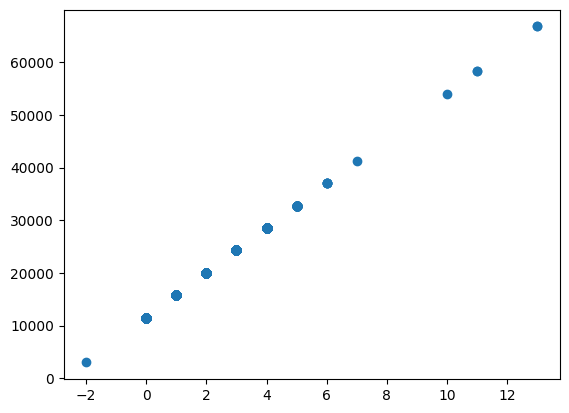

In [10]:
# Ploteamos prediccion con matplolib
plt.scatter(departamentos_in_regression.bedrooms, resultados.predict())

# Error Cuadrático Medio


Recordemos que la definición del error cuadrático medio es:

$MSE=\sqrt{\frac{\sum^n_{i=1} e_i^2}{n-2}}$ donde

$e=y-\hat{y}$



Como parte de los resultados de la estimación, se puede recuperar MSE, pero ojo, lo que devuelve es el resultado al cuadrado (previo a la raiz)

In [11]:
resultados.mse_resid

np.float64(243930120.92914465)

In [12]:
# Le tomo raiz
resultados.mse_resid**0.5

np.float64(15618.262417091879)

Podemos corroborar esto calculando a mano el MSE

In [15]:
ypred = resultados.predict()
residuos=departamentos_in_regression['price']-ypred
rss=np.sum(residuos**2)
MSE=(rss/(resultados.nobs-2))
MSE

np.float64(243930120.92914465)

Tomando raiz cuadrada...

In [16]:
MSE**0.5

np.float64(15618.262417091879)

# ¿Cómo son los residuos (errores estimados) del modelo estimado?

## Primero analizo la normalidad de la distribución
Inspecciono el histograma para tener una idea rápida de la distribución




<Axes: >

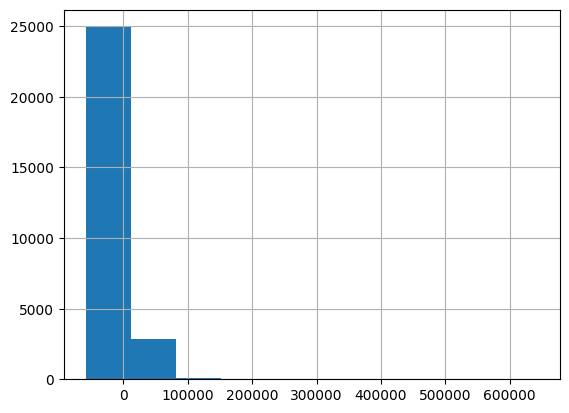

In [17]:
residuos.hist()

## Analizamos visualmente si la varianza del residuo es constante (homocedasticidad)

In [18]:
departamentos_in_regression['residuos']=residuos

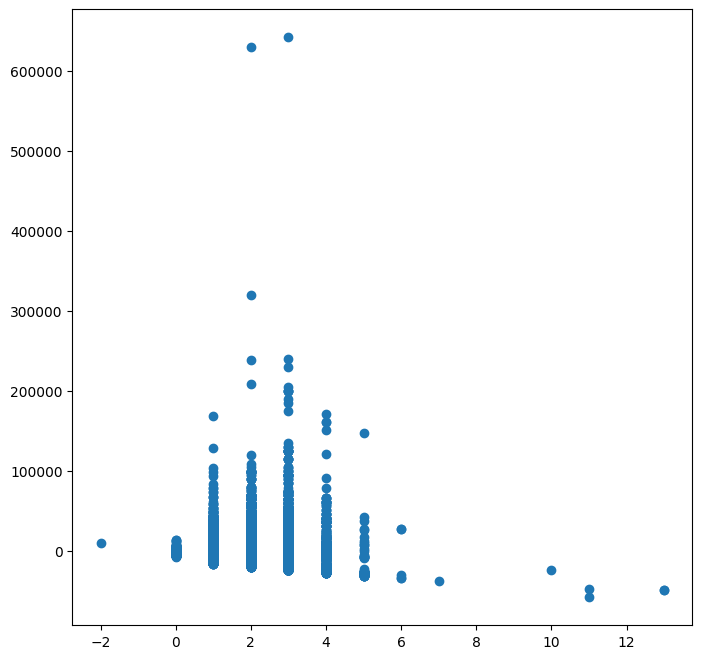

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(departamentos_in_regression['bedrooms'], departamentos_in_regression['residuos'], 'o', label="Data")

## Analizamos visualmente la distribución espacial en busca de correlación espacial
(más adelante implementaremos medidas específicas)

<Axes: >

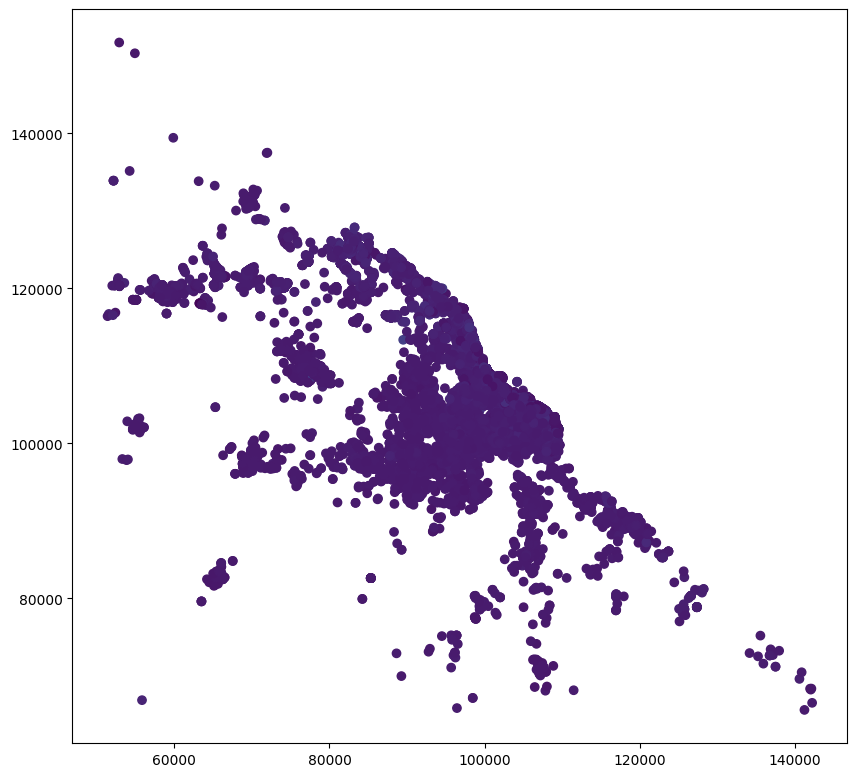

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
departamentos.join(departamentos_in_regression['residuos']).plot(ax=ax, column='residuos')
#ax.set_xlim(80000, 110000)
#ax.set_ylim(90000, 110000)

### Agregando capa de referencia con la librería contextily

(np.float64(-6572476.256380769),
 np.float64(-6451034.427907456),
 np.float64(-4160802.376179422),
 np.float64(-4045391.256813091))

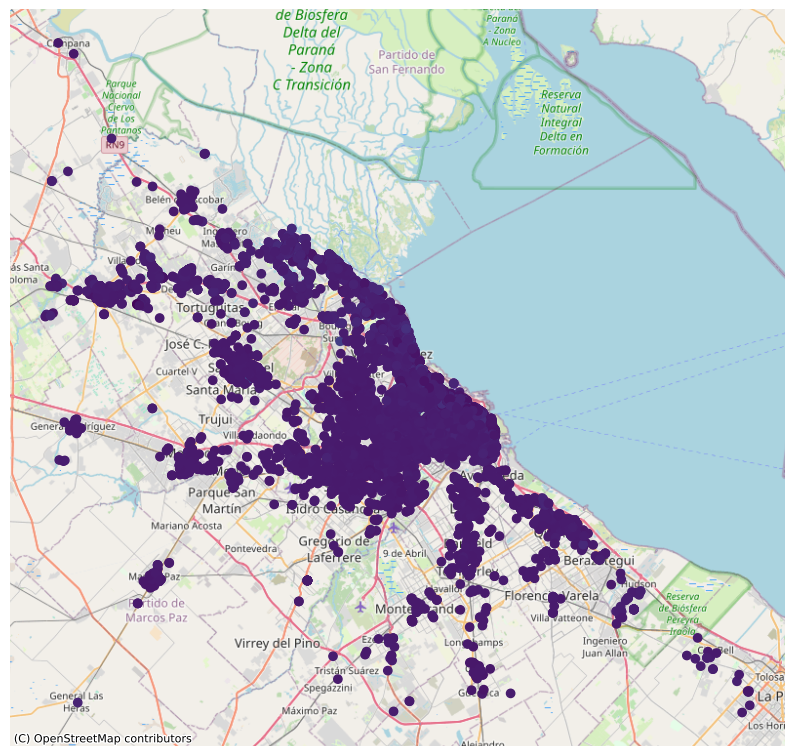

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
departamentos.join(departamentos_in_regression['residuos']).to_crs(epsg=3857).plot(ax=ax, column='residuos')
#ax.set_xlim(80000, 110000)
#ax.set_ylim(90000, 110000)
#cx.add_basemap(ax, crs=departamentos.to_crs(epsg=3857).crs.to_string(), source=cx.providers.Stamen.TonerLite)
#ax.axis('off')
cx.add_basemap(ax, crs=departamentos.to_crs(epsg=3857).crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
ax.axis('off')

(np.float64(-6572476.256380769),
 np.float64(-6451034.427907456),
 np.float64(-4160802.376179422),
 np.float64(-4045391.256813091))

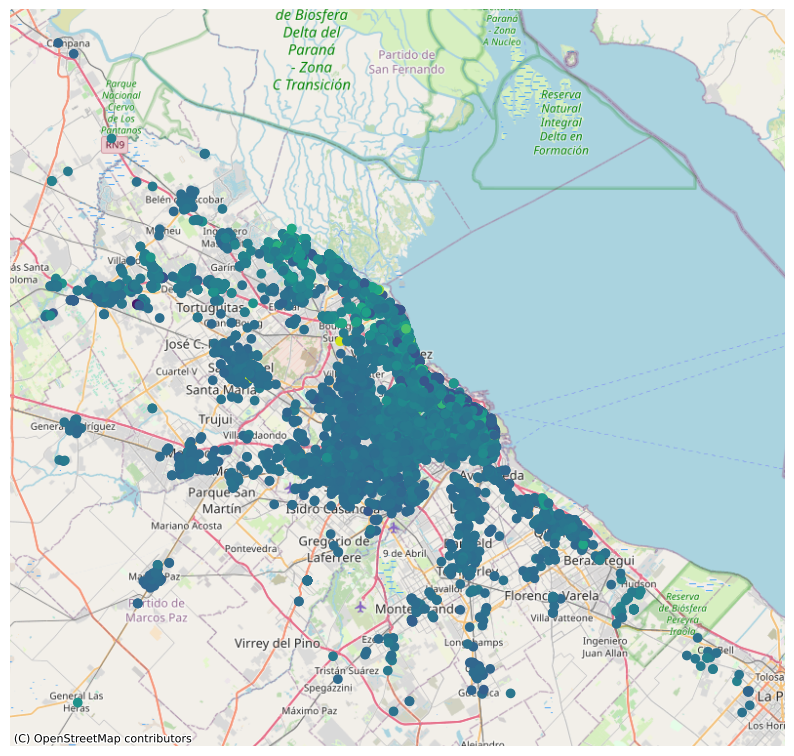

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
departamentostemp=departamentos.join(departamentos_in_regression['residuos'])
departamentostemp.loc[departamentostemp.residuos<80000].to_crs(epsg=3857).plot(ax=ax, column='residuos')
#ax.set_xlim(80000, 110000)
#ax.set_ylim(90000, 110000)
cx.add_basemap(ax, crs=departamentos.to_crs(epsg=3857).crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
ax.axis('off')